In [1]:
from keras.datasets import reuters

C:\Users\omar\Anaconda31\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [42]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [47]:
import numpy as np
def vectorization(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
x_train = vectorization(train_data)
x_test = vectorization(test_data)

In [56]:
from keras.utils.np_utils import to_categorical
one_hot_line_train_labels = to_categorical(train_labels)
one_hot_line_test_labels = to_categorical(test_labels)

In [85]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [86]:
x_val = x_train[:1000]
partialXtrain = x_train[1000:]
y_val = one_hot_line_train_labels[:1000]
partialYtrain = one_hot_line_train_labels[1000:]


In [87]:
history = model.fit(partialXtrain,partialYtrain,epochs = 20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 356us/step - loss: 2.7897 - acc: 0.3043 - val_loss: 1.9877 - val_acc: 0.4770
Epoch 2/20
7982/7982 [==============================] - 2s 256us/step - loss: 1.7617 - acc: 0.5162 - val_loss: 1.6024 - val_acc: 0.5690
Epoch 3/20
7982/7982 [==============================] - 2s 256us/step - loss: 1.4802 - acc: 0.5978 - val_loss: 1.4855 - val_acc: 0.6110
Epoch 4/20
7982/7982 [==============================] - 2s 257us/step - loss: 1.3222 - acc: 0.6328 - val_loss: 1.4572 - val_acc: 0.6250
Epoch 5/20
7982/7982 [==============================] - 2s 237us/step - loss: 1.1454 - acc: 0.6913 - val_loss: 1.4169 - val_acc: 0.6480
Epoch 6/20
7982/7982 [==============================] - 2s 237us/step - loss: 1.0370 - acc: 0.7254 - val_loss: 1.2933 - val_acc: 0.6920
Epoch 7/20
7982/7982 [==============================] - 2s 235us/step - loss: 0.9128 - acc: 0.7493 - val_loss: 1.3279 - val_acc: 0.6700


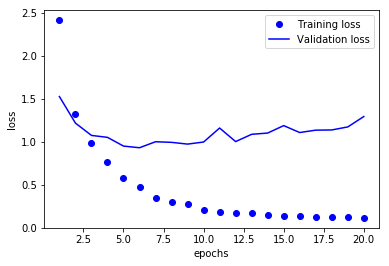

In [83]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)
import matplotlib.pyplot as plt
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

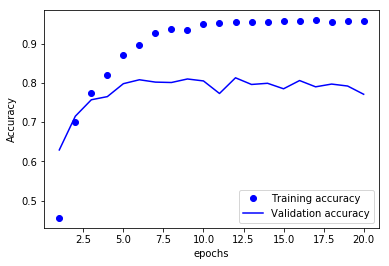

In [84]:
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']
plt.plot(epochs,accuracy,'bo',label = 'Training accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [73]:
# Building the model from scratch and test the accuracy with the testing data
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='sigmoid'))
model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy'
                  ,metrics = ['accuracy']
             )
model.fit(partialXtrain,partialYtrain,epochs=9,batch_size=512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_line_test_labels)
print(results)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 261us/step - loss: 3.3689 - acc: 0.4693 - val_loss: 2.8663 - val_acc: 0.3960
Epoch 2/9
7982/7982 [==============================] - 2s 210us/step - loss: 2.4286 - acc: 0.3607 - val_loss: 2.0405 - val_acc: 0.3540
Epoch 3/9
7982/7982 [==============================] - 2s 201us/step - loss: 1.6899 - acc: 0.3515 - val_loss: 1.6270 - val_acc: 0.3550
Epoch 4/9
7982/7982 [==============================] - 2s 201us/step - loss: 1.2927 - acc: 0.4832 - val_loss: 1.1863 - val_acc: 0.7220
Epoch 5/9
7982/7982 [==============================] - 2s 218us/step - loss: 0.8196 - acc: 0.8292 - val_loss: 1.0262 - val_acc: 0.7900
Epoch 6/9
7982/7982 [==============================] - 2s 231us/step - loss: 0.6305 - acc: 0.8756 - val_loss: 0.9623 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 2s 212us/step - loss: 0.5033 - acc: 0.9013 - val_loss: 0.9128 - val_acc: 0.8060
Epoch 8